<a href="https://colab.research.google.com/github/Pralay567/Iris-DecisionTree-MLTask/blob/main/exam_eligibility_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving BCSEAIML6J.csv to BCSEAIML6J (2).csv
Enter minimum attendance percentage required (default=75): 75

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



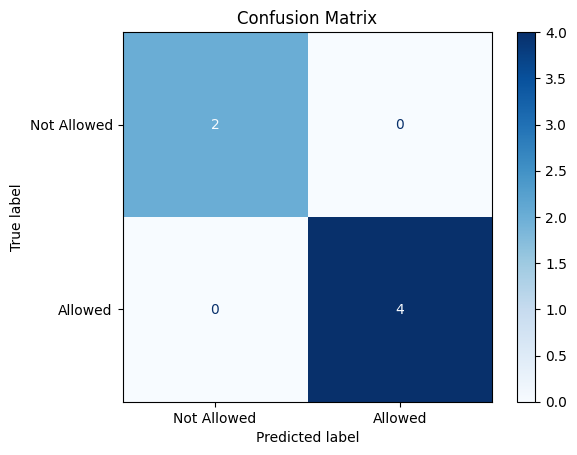

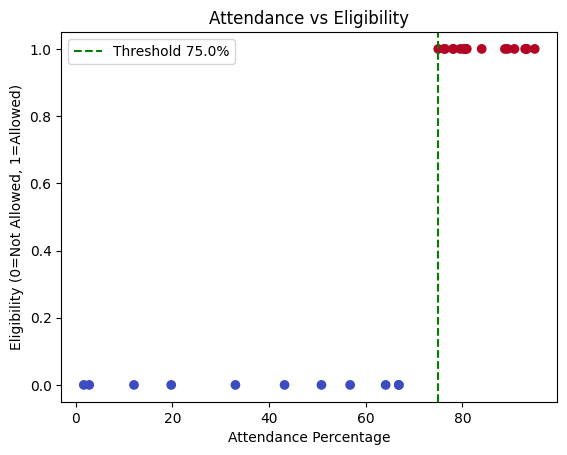

Enter the name of the student to check eligibility: Pralay Bajkhan

Student: Pralay Bajkhan
Attendance: 90.76%
Prediction: Allowed


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from google.colab import files
import io

# Upload CSV file
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Clean Name column for safer matching
df['Name'] = df['Name'].astype(str).str.strip().str.lower()

# Ask user for attendance threshold (default=75%)
threshold = float(input("Enter minimum attendance percentage required (default=75): ") or 75)

# Clean and process the data
df = df.dropna(subset=["Total"])
valid_format = df["Total"].astype(str).str.contains(r"\d+\|\d+")
df = df[valid_format].copy()

df[['Attended', 'Total_Classes']] = df['Total'].str.split('|', expand=True).astype(int)
df['Attendance_Percentage'] = (df['Attended'] / df['Total_Classes']) * 100
df['Allowed'] = (df['Attendance_Percentage'] >= threshold).astype(int)

# Features and labels
X = df[['Attendance_Percentage']]
y = df['Allowed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Allowed", "Allowed"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Scatter plot of Attendance vs Eligibility
plt.scatter(df['Attendance_Percentage'], df['Allowed'], c=df['Allowed'], cmap='coolwarm')
plt.axvline(x=threshold, color='green', linestyle='--', label=f"Threshold {threshold}%")
plt.xlabel("Attendance Percentage")
plt.ylabel("Eligibility (0=Not Allowed, 1=Allowed)")
plt.legend()
plt.title("Attendance vs Eligibility")
plt.show()

# Prediction for a specific student
student_name = input("Enter the name of the student to check eligibility: ").strip().lower()
matched = df[df['Name'] == student_name]

if not matched.empty:
    attendance = matched.iloc[0]['Attendance_Percentage']
    prediction = model.predict([[attendance]])[0]
    status = "Allowed" if prediction == 1 else "Not Allowed"
    print(f"\nStudent: {student_name.title()}")
    print(f"Attendance: {attendance:.2f}%")
    print(f"Prediction: {status}")
else:
    print(f"\nStudent '{student_name}' not found in the dataset.")
